# Demo of datasciencetools module

#### By Matthew Oberhardt

## About this module

The datasciencetools module includes a collection of tools I've developed to make doing and visualizing data science results easier and more beautiful. This project was started during my time at Insight Data Science, and includes tools I built during my Insight project, as well as during secondary projects and data challenges. You can find good use cases of the datasciencetoolbox in two projects listed on my github account:

> **My Insight project (predicting Parkinson's from mobile app data):**

> https://github.com/mattoby/mpower_memory

> **A project predicting blood lead levels in Michigan:**

> https://github.com/mattoby/michigan_lead

I will include below some more examples and use cases of the datasciencetoolbox, using a simple dataset that I'll generate below.



## Imports

A few initial imports:

In [389]:
from __future__ import division
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from numpy import nan
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from scipy.stats import ranksums

%matplotlib inline  

Now, import the datasciencetool module. It can be downloaded (or pulled) from github, and then loaded the standard way:

In [390]:
## Path appends, if needed:
# sys.path.append(LOCAL_PATH_TO_DATASCIENCETOOLS)

## Import the toolbox:
import datasciencetools as dst

While we're at it, I'll include some code I like to run in my notebooks to get some nice behaviors I like:

In [391]:
## To make modules automatically reload every time you run code
## (e.g., if you have a module you are updating as you work,
## it will reload with your updates every time you run a cell in the
## notebook)
%load_ext autoreload
%autoreload 2

## To import a path:
# import sys
# sys.path.append(path)

## so that i can print as many rows and columns as i want from a df:
pd.set_option('display.max_columns', None) # 500
pd.set_option('display.max_rows', 1000)

## import normal division as default behavior (already imported):
# from __future__ import division

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load example dataset
Here I load in a sample dataframe of supermarket purchase data. I add a new column to this dataframe that is a boolean (True/False) column, as some of the analyses and visualization tools require a 'hue' column, which is boolean

In [398]:
#df = pd.read_csv('/Users/matto/Dropbox/Insight/datachallenge/datachallenge_2/supermarket_data_aggr.csv')
#df = df.dropna()
#df = df.sample(1000)
#df.to_csv('/Users/matto/Dropbox/Insight/datasciencetools/supermarket_data_aggr_subset.csv',index=False)
df = pd.read_csv('supermarket_data_aggr_subset.csv')

In [399]:
# setup:

# add a 'hue column', which will be a boolean column for whether somebody purchased a lot or not
# this hue column will be used as an example whenever I need a boolean column
huecol = 'purchasegroup'
cutoff = np.mean(df['amount_purchased'])
df = dst.add_binary_cutoff_col(df,'amount_purchased', huecol, cutoff=cutoff)
huevals = [0,1]
huelabels = ['low roller','high roller']

# create a convenient set of features to look at for some analyses
features = [huecol, 'avg_distance_to_shops','avg_purchase','avg_price','products_purchased', 'unique_products_purchased']

In [400]:
df.head(3)

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5,products_purchased_shop_1,products_purchased_shop_2,products_purchased_shop_3,products_purchased_shop_4,products_purchased_shop_5,unique_products_purchased_shop_1,unique_products_purchased_shop_2,unique_products_purchased_shop_3,unique_products_purchased_shop_4,unique_products_purchased_shop_5,amount_purchased_shop_1,amount_purchased_shop_2,amount_purchased_shop_3,amount_purchased_shop_4,amount_purchased_shop_5,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5,purchasegroup
0,24795,2163.4788,2129.3828,3097.7100,1526,280,3137.821,11.048665,2.632775,2,3097.7100,2129.3828,1729.3933,3291.1870,2212.3325,11,1515,0,0,0,10,274,0,0,0,39.812,3098.009,0.00,0,0.000,3.981200,11.306602,0.000000,0,0.00000,3.409500,2.604427,0.000000,0,0.00000,0
1,32821,1754.8755,1112.8936,2686.5322,368,170,872.611,4.341348,2.904806,2,2686.5322,1112.8936,990.5391,3417.0405,1830.1667,140,228,0,0,0,82,119,0,0,0,336.479,536.132,0.00,0,0.000,4.103403,4.505311,0.000000,0,0.00000,3.159781,2.729109,0.000000,0,0.00000,0
2,12221,1635.3676,1362.4164,3252.0960,4255,467,8496.999,15.282372,2.457174,4,3252.0960,1362.4164,1601.5933,3800.0176,2370.3376,106,4108,37,0,4,74,445,33,0,4,221.427,8200.661,71.02,0,3.891,2.992257,18.428452,2.152121,0,0.97275,2.312311,2.526560,2.026303,0,0.97275,1


## Visualization tools

### Plot correlation matrix of df columns after hierarchical clustering

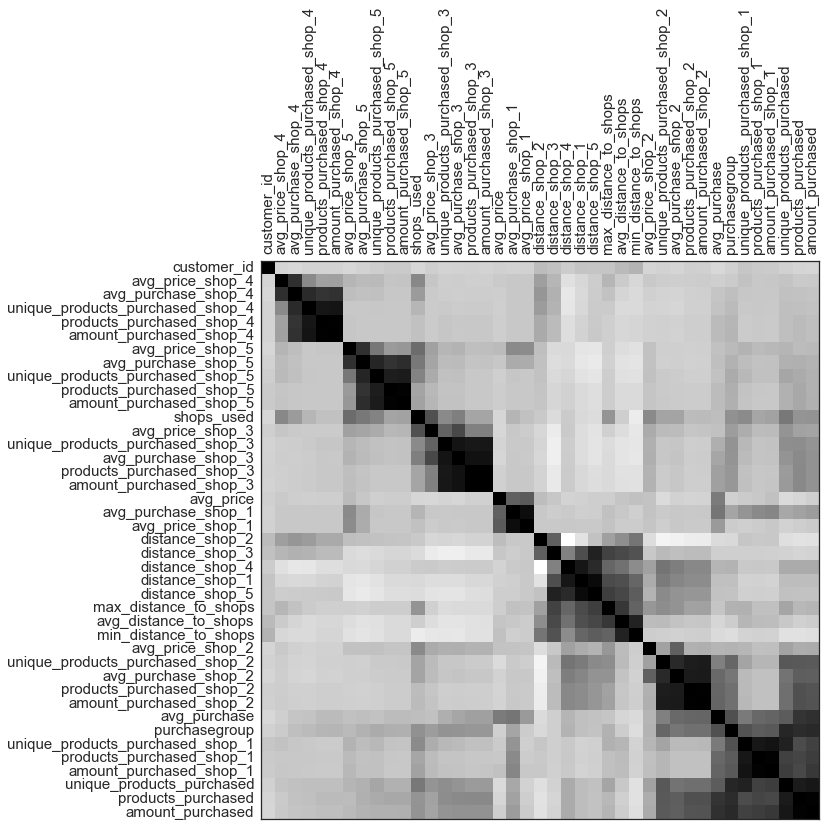

In [401]:
dst.plot_corr(df)

### Pairgrid with hues

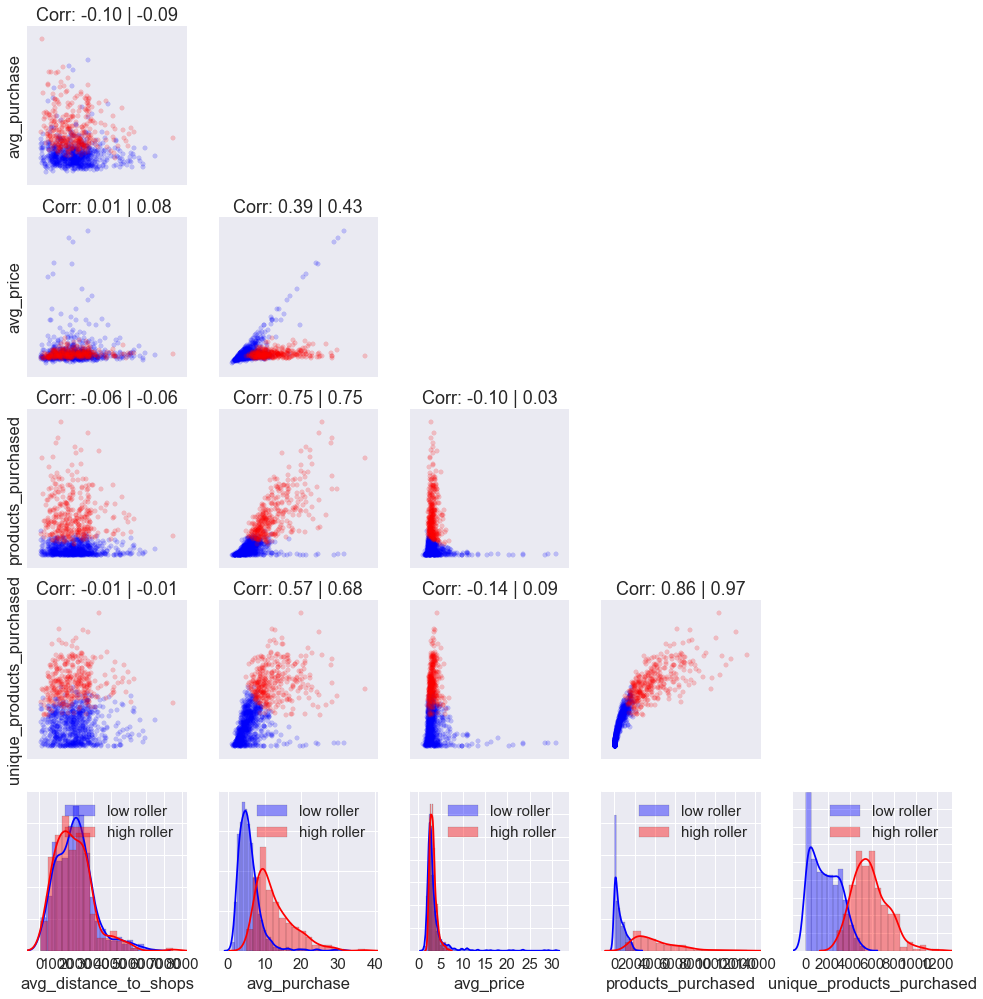

In [402]:
dst.pairgrid_with_hues(df[features], hue=huecol, huevals=huevals, huelabels=huelabels, figsize=(20,20), DispCorrs=True, alpha=0.2, setloglog=False, rename_features=False, legendLoc=1)

### Pairgrid with hues, with loglog axes

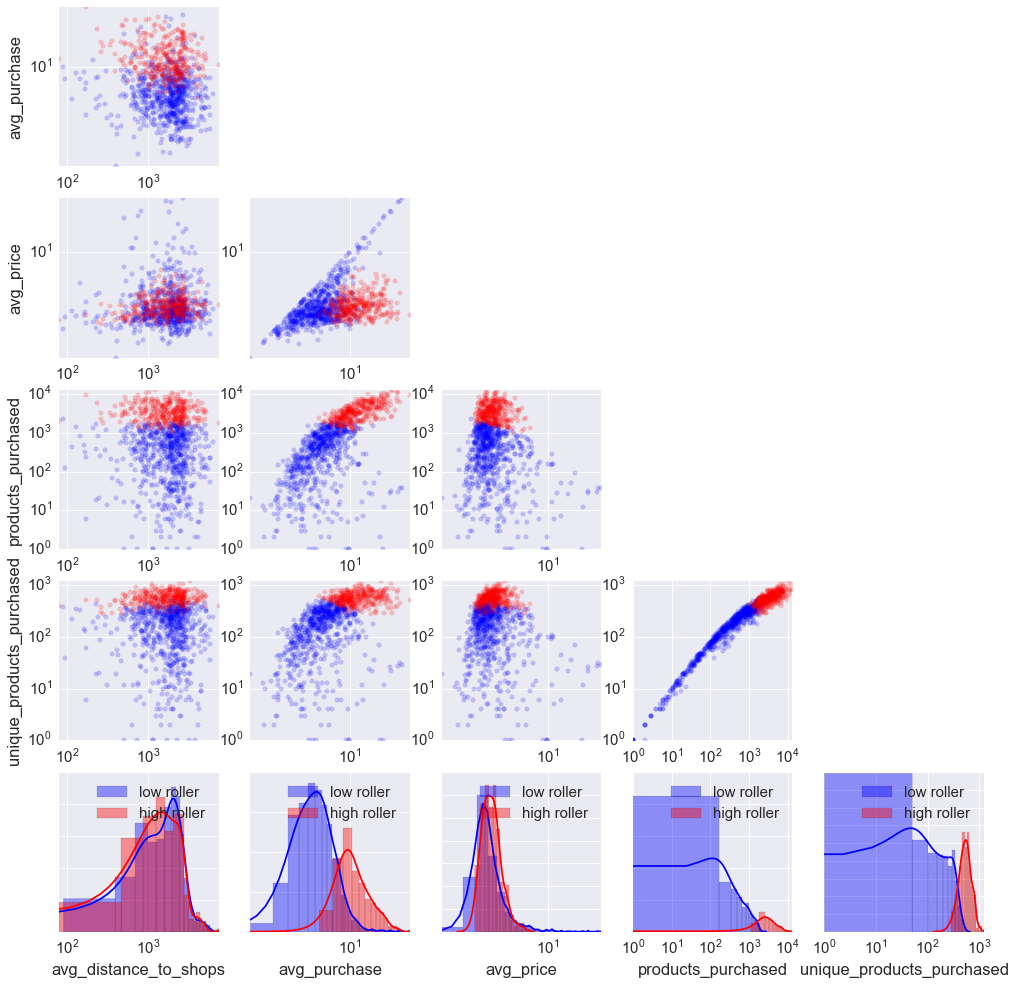

In [403]:
dst.pairgrid_with_hues(df[features], hue=huecol, huevals=huevals, huelabels=huelabels, figsize=(20,20), DispCorrs=False, alpha=0.2, setloglog=True, rename_features=False, legendLoc=1)

### Plotting df columns as histograms, with hue

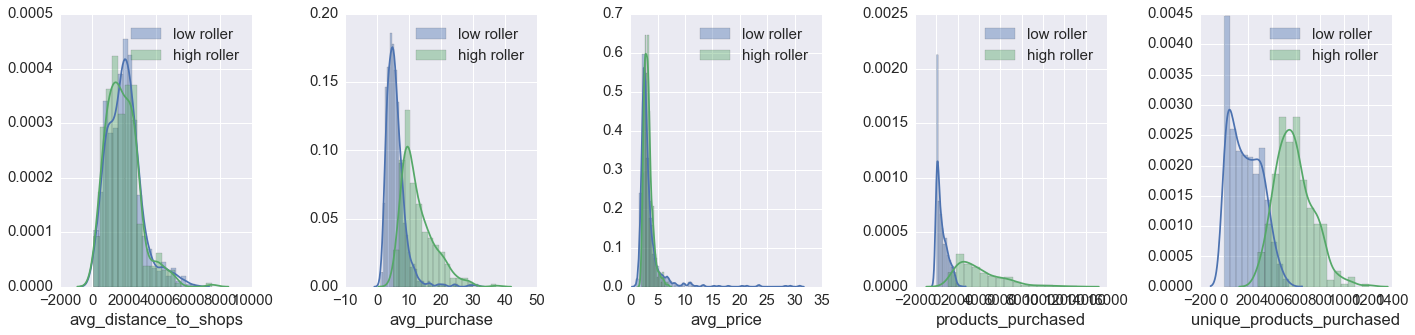

In [404]:
dst.distplot_subplots_with_hue(df[features], huecol, huevals, huelabels, Nplotrows=1, Nplotcols=5, setxlog=False, figsize=(20,5), legendloc=1, rug=False, rename_features=False)

### Plotting df columns as histograms, no hue

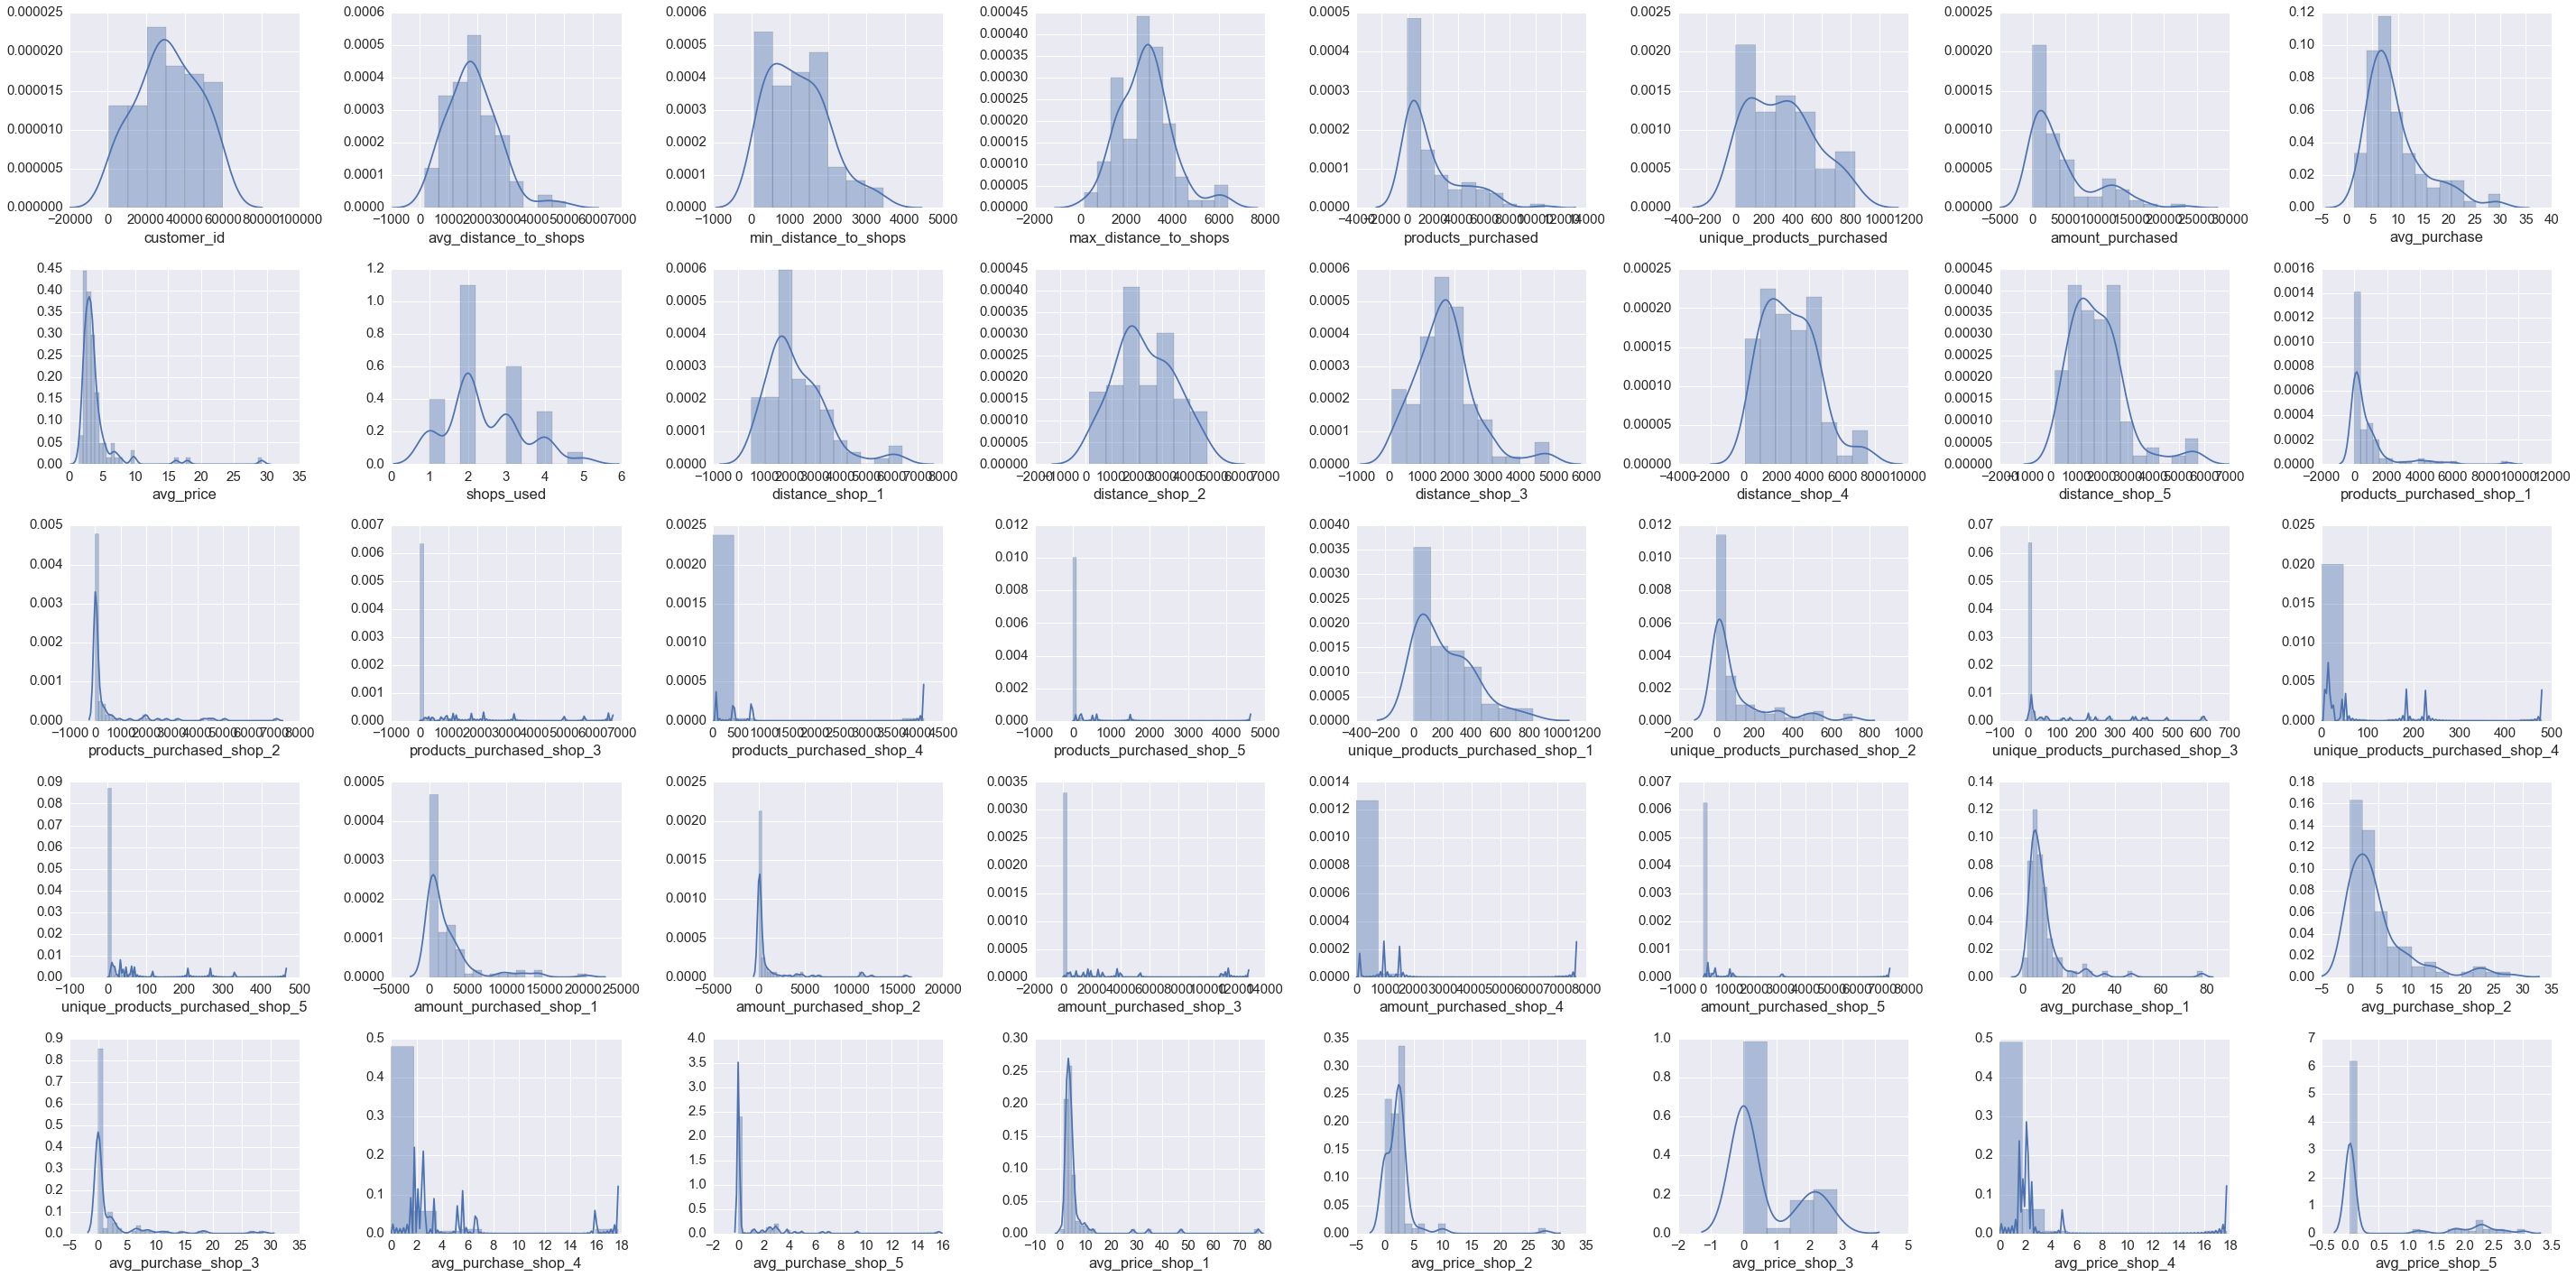

In [405]:
dst.distplot_subplots(df.iloc[:,:40].sample(n=100), 5, 8, setxlog=False, figsize=(40,20))

### Nicely formatted heatmap 

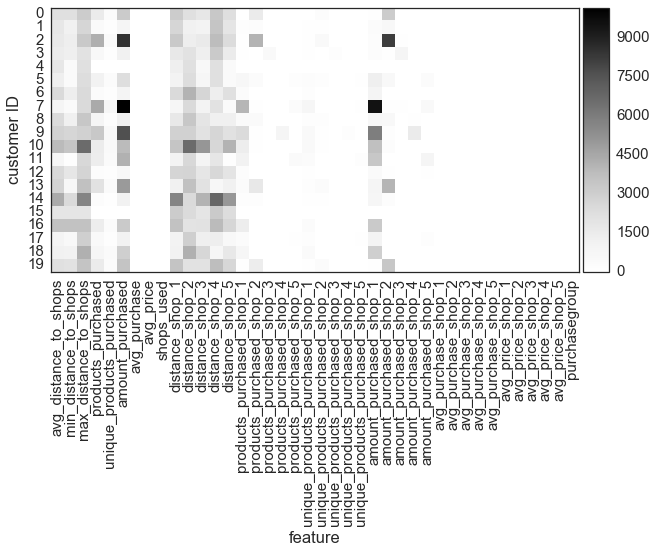

In [406]:
allfeatures = list(df.columns.copy())
allfeatures.remove('customer_id')
df_mat = df.head(20).as_matrix(columns=allfeatures)
dst.heatmap(df_mat, rownames=df.head(20).index, colnames=allfeatures, xlabel='feature', ylabel='customer ID', figsize=(10,5))

### t-tests of one column versus all others

In [407]:
dst.column_ttests(df[features], 'avg_distance_to_shops', ttestcolCutoff=np.mean(df['avg_distance_to_shops']))

,pvals,tstats
avg_purchase,0.003495,2.927436
products_purchased,0.094724,1.672575
purchasegroup,0.115126,1.576943
avg_price,0.702165,0.382510
unique_products_purchased,0.715908,0.364036


## Dataframe conveniences

### Determine if a df column contains any strings

In [408]:
df2 = pd.DataFrame({'col1':['string here',7],'col2':[1,2]})
hasstring = dst.check_for_string_in_dfcol(df2, 'col1')
print 'column "col1" has a string somewhere in it?: ', hasstring
df2

column "col1" has a string somewhere in it?:  True


,col1,col2
0,string here,1
1,7,2


### Suppress the stdouts (e.g., print statements) from some code

In [409]:
print "You can see this"
with dst.suppress_stdout():
    print "You cannot see this"
print "And you can see this again"

You can see this
And you can see this again


### Move a column to be last column in df

In [410]:
print 'last column: %s' % df.columns[-1]
df = dst.move_col_to_end_of_df(df, 'shops_used')
print 'last column: %s' % df.columns[-1]

last column: purchasegroup
last column: shops_used


### Show the unique values in every column 

In [411]:
# note, this will only print the columns with less than nvalscutoff unique values
dst.unique_vals(df, nvalscutoff=100)

total columns in df: 1000


,col,numnans,uniquevals
0,products_purchased_shop_4,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,unique_products_purchased_shop_4,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,purchasegroup,0,"[0.0, 1.0]"
3,shops_used,0,"[1.0, 2.0, 3.0, 4.0, 5.0]"


### Group by one column and show average of all other columns for each group

In [413]:
dst.groupby_col_and_avg_other_cols(df, col='shops_used', keepColinDf=False)

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5,products_purchased_shop_1,products_purchased_shop_2,products_purchased_shop_3,products_purchased_shop_4,products_purchased_shop_5,unique_products_purchased_shop_1,unique_products_purchased_shop_2,unique_products_purchased_shop_3,unique_products_purchased_shop_4,unique_products_purchased_shop_5,amount_purchased_shop_1,amount_purchased_shop_2,amount_purchased_shop_3,amount_purchased_shop_4,amount_purchased_shop_5,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5,purchasegroup,shops_used
shops_used,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,33351.535000,1835.257866,1835.257866,1835.257866,553.565000,134.625000,1388.302400,6.926274,3.882089,2295.331492,2740.079543,1995.769798,2467.380516,1918.612240,332.625000,171.160000,20.375000,27.765000,1.640000,92.025000,31.290000,4.725000,5.920000,0.665000,918.648875,369.780360,43.365845,53.508575,2.998745,4.733171,1.645043,0.194227,0.255641,0.098192,2.964603,0.688679,0.068258,0.090634,0.069915,0.090000,1
2,30522.756691,2155.294241,1418.264163,3192.457985,1699.304136,311.070560,4035.441375,8.502300,3.578807,2849.342786,2215.355009,2043.693340,3340.086751,2310.236914,826.194647,743.618005,88.907543,27.763990,12.819951,199.829684,146.700730,12.355231,5.469586,2.304136,2142.128951,1649.975391,167.971672,54.507708,20.857657,7.866935,5.433085,0.571853,0.330959,0.204638,4.772345,2.139213,0.195081,0.191606,0.143315,0.316302,2
3,29648.052632,1877.106421,1113.776463,3016.582148,2091.599190,394.186235,4981.956905,8.426954,3.211725,2270.140316,2420.204589,1699.524988,2716.327252,1773.551907,983.700405,683.032389,341.506073,39.165992,44.194332,260.429150,144.720648,68.769231,12.255061,13.943320,2597.458653,1557.112218,666.926151,75.385826,85.074057,9.047116,5.574386,3.020080,0.738428,0.838336,5.214156,2.693100,1.399181,0.454606,0.547023,0.457490,3
4,26379.717949,1823.197591,998.862433,3189.656350,2461.341880,443.273504,5794.037863,8.181039,3.127926,2046.388675,2498.585012,1602.444987,2681.299336,1534.713884,1123.641026,627.461538,389.188034,15.401709,305.649573,298.145299,160.299145,80.777778,8.752137,66.794872,2987.437258,1435.057760,752.794773,30.302504,588.445592,7.879147,5.901721,3.573586,1.161283,3.097130,3.834708,3.005250,1.839446,1.043206,1.717151,0.495726,4
5,26593.960000,1688.236091,978.841867,3339.748400,2196.080000,455.880000,5540.740520,7.569148,3.185747,1848.326748,2601.505456,1591.533847,2369.577582,1420.299667,1169.280000,286.120000,355.520000,200.240000,184.920000,320.640000,108.200000,104.880000,42.080000,74.480000,3339.996272,678.978840,753.049332,384.496240,384.219840,8.341001,4.031424,3.936046,3.150382,3.368315,4.094738,2.514859,2.239068,2.277426,1.967780,0.520000,5


### Number of nulls per column

In [414]:
dst.display_num_nulls_per_column(df[features])

Number of nulls per column:

purchasegroup                0
avg_distance_to_shops        0
avg_purchase                 0
avg_price                    0
products_purchased           0
unique_products_purchased    0
dtype: int64


### Resample a 'distribution' column based on 'split' column
Say you have a dataframe with the fields:

> Age, HasCancer, Feature1, Feature2, ...

Where rows are patients, and all of the features are continuous variables used to predict cancer, except for HasCancer, which is a boolean True or False.


Say you want to predict if someone has cancer, but your dataframe is not age-balanced; the distribution of ages is different for cancer versus non-cancer patients. This function (dst.resample_to_match_distribution) will allow you to re-sample the non-cancer rows of the dataframe so that the distribution of ages roughly matches the distribution of ages in the cancer rows of the dataframe.

This is done below for the case of 'avg_purchase_shop_2' and 'purchasegroup' in our shopping dataframe -- the avg_purchase_shop2 field for high roller shoppers (represented as those who have True in the 'purchasegroup' column) is resampled to have the same distribution as the low roller shoppers (those with False in the purchasegroup column).



RanksumsResult(statistic=1.7248159943270205, pvalue=0.084560638389362064)


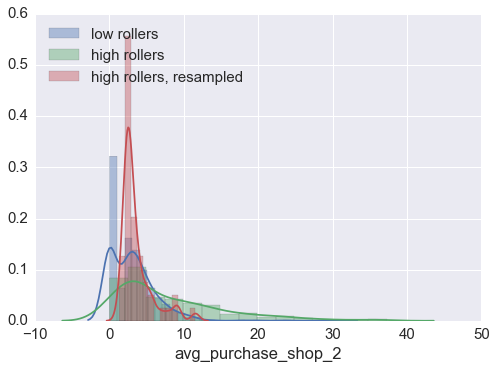

In [415]:
distcol = 'avg_purchase_shop_2'
splitcol = 'purchasegroup'
splitVal_resample = True
splitVal_guide = False
nbins = 10
nResamples = 50
df_resampled, df_guide, df_resample = dst.resample_to_match_distribution(df, distcol, splitcol, splitVal_resample, splitVal_guide, nbins, nResamples)

sns.distplot(df_guide[distcol].dropna(), label='low rollers')
sns.distplot(df_resample[distcol].dropna(), label='high rollers')
sns.distplot(df_resampled[distcol].dropna(), label='high rollers, resampled')
plt.legend(loc=2)
    
x = df_resampled[distcol].dropna().values
y = df_guide[distcol].dropna().values
p2 = ranksums(x, y)
print p2

## Machine learning related functions

### Setup (run classification model)

In [416]:
# 1. Predict how much someone will purchase:
labelcol = 'purchasegroup'
feat = ['avg_distance_to_shops','avg_purchase','avg_price','products_purchased','unique_products_purchased']
X = df.loc[:,feat].values
y = df.loc[:,labelcol].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:,1]


### Confusion matrix

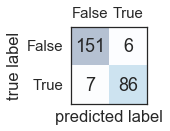

In [417]:
dst.render_confusion_matrix(y_test, y_test_pred, pos_class=True, neg_class=False)

### Feature importances

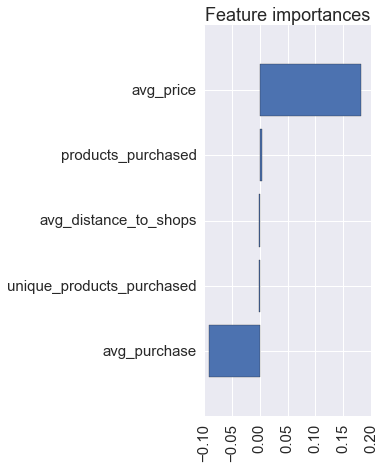

In [418]:
plt = dst.plot_feature_importances(feat, model.coef_[0], Nfeatures=100)

### ROC curve

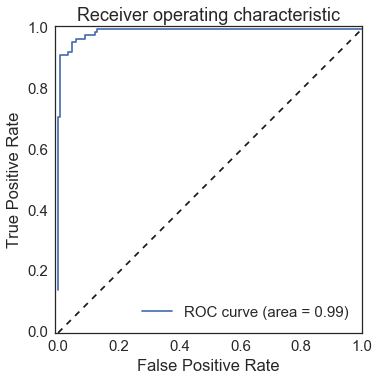

In [419]:
out = dst.plot_roc_curve(y_test, y_test_proba, startNewPlot=True, withLabel=True)

### Multiple overlaid ROC curves, with mean

In [420]:
# generate randomly varied y_test_probas
y_tests = []
y_test_probas = []
for n in range(10):
    y_tests.append(y_test)
    y_test_proba_curr = y_test_proba + np.random.normal(0,(n+1)*0.1,len(y_test_proba))
    y_test_probas.append(y_test_proba_curr)

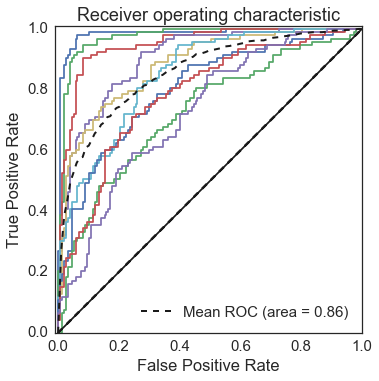

In [421]:
dst.plot_roc_curves_with_mean(y_tests, y_test_probas)